# 숫자 손글씨 분류하기

--
## 문제 정의
28x28 픽셀의 손글씨 숫자 이미지를 입력 받아서 실제로 의미하는 숫자를 인식해보자

## 가설
784개의 특징 데이터를 구성한 후 머신러닝 분석을 한 후 어떤 숫자인지 추측이 가능

## 목표
28x28 사이즈의 이미지로부터 label값을 얻어낸다

# 데이터 구성
784개 입력특징(28x28픽셀)
**출력 데이터** label
데이터의 총 행수 10000개

# 분석단계
## 단계1) 데이터를 불러온다
## 단계2) EDA & Feature Engnieering
## 단계3) 데이터셋 구성한다
## 단계4) 모델링하고 학습
## 단계5) 모델 검증

---
1. 데이터를 불러오기

In [4]:
import pandas as pd
import numpy as np

In [5]:
df = pd.read_csv('data/digit.csv')
df.head()

,"pixel 1,1","pixel 1,2","pixel 1,3","pixel 1,4","pixel 1,5","pixel 1,6","pixel 1,7","pixel 1,8","pixel 1,9","pixel 1,10",...,"pixel 28,20","pixel 28,21","pixel 28,22","pixel 28,23","pixel 28,24","pixel 28,25","pixel 28,26","pixel 28,27","pixel 28,28",label
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4


## 2. EDA& Feature Engineering

In [7]:
import matplotlib.pyplot as plt

import seaborn as sns
sns.set()

In [8]:
df.describe()

,"pixel 1,1","pixel 1,2","pixel 1,3","pixel 1,4","pixel 1,5","pixel 1,6","pixel 1,7","pixel 1,8","pixel 1,9","pixel 1,10",...,"pixel 28,20","pixel 28,21","pixel 28,22","pixel 28,23","pixel 28,24","pixel 28,25","pixel 28,26","pixel 28,27","pixel 28,28",label
count,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.0,10000.0,10000.0,10000.0,10000.0,10000.000000
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000480,0.000239,0.000050,0.000025,0.0,0.0,0.0,0.0,0.0,4.453400
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.017804,0.013588,0.003535,0.002500,0.0,0.0,0.0,0.0,0.0,2.884451
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,2.000000
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,4.000000
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,7.000000
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.988281,0.988281,0.250000,0.250000,0.0,0.0,0.0,0.0,0.0,9.000000


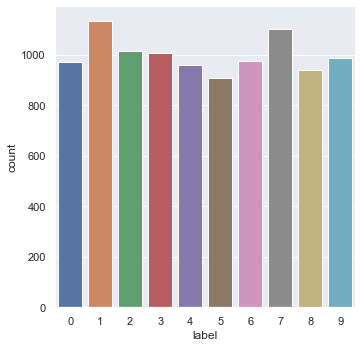

In [9]:
sns.catplot(data=df, x='label', kind='count')

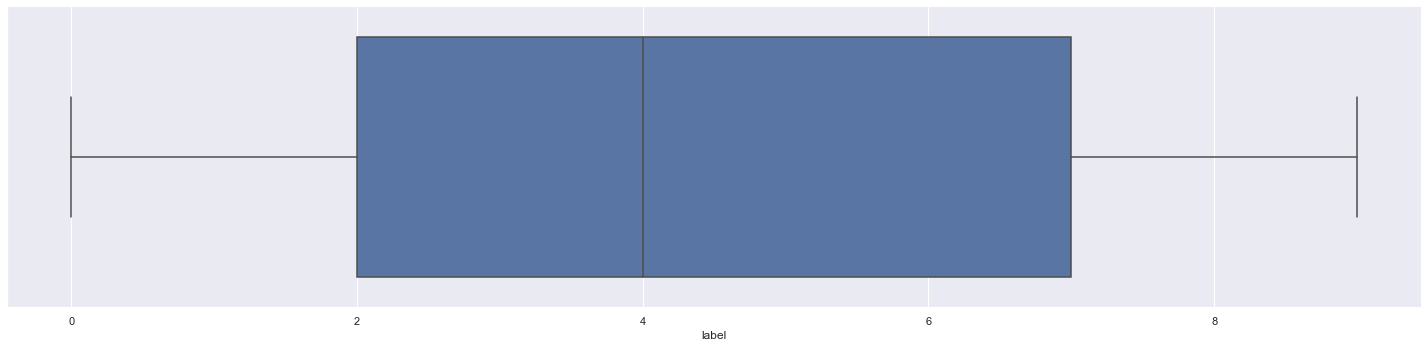

In [10]:
sns.catplot(data=df, x='label', kind='box', aspect=4)

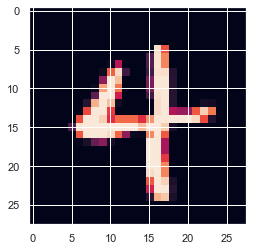

In [11]:
numbers = df.drop(['label'], axis = 1)

nth = 0 # 0~9999 바꾸시면서 살펴보셔요
img = np.reshape(numbers.iloc[nth].values, [28, 28])
plt.imshow(img)
plt.show()

---
# 3. data set 구성하기

In [13]:
input_data = df.drop('label', axis = 1)
target_data = df['label']

print(input_data.shape, target_data.shape)

(10000, 784) (10000,)


In [14]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(input_data, target_data, test_size=0.2)

print(x_train.shape, x_test.shape)

(8000, 784) (2000, 784)


## validation set 만들기
### 모델 제작 과정 중, 학습된 모델의 성능을 측정하기 위한 데이터

In [15]:
x_valid = x_train[0:1600]
y_valid = y_train[0:1600]

x_train = x_train[1600:]
y_train = y_train[1600:]

---
# 4. 모델링 & 학습

## Random Forest

In [18]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators = 100)

In [19]:
forest.fit(x_train, y_train) # 데이터 학습

RandomForestClassifier()

In [20]:
print('training set accuracy:', forest.score(x_train, y_train)) # 학습 1번 시키면 100% 맞춤
print('validation set accuracy: ', forest.score(x_valid, y_valid))

training set accuracy: 1.0
validation set accuracy:  0.94375


In [21]:
from sklearn.svm import SVC
model = SVC()
model.fit(x_train, y_train)

SVC()

In [22]:
print('training set accuracy:', model.score(x_train, y_train))

training set accuracy: 0.98515625


---
# 5. 모델 검증

In [23]:
print('RT: test set accuracy:', forest.score(x_test, y_test))

RT: test set accuracy: 0.9445


In [24]:
print('SVM: test set accuracy:', model.score(x_test, y_test))

SVM: test set accuracy: 0.9565


## 실제 예측 결과물 살펴보기

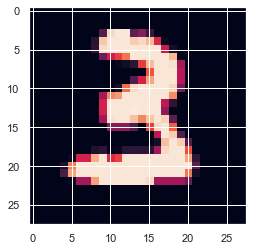

---인식된 숫자는? [3] 입니다


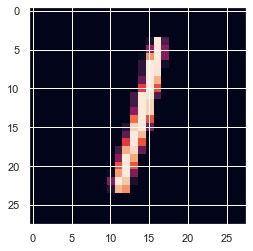

---인식된 숫자는? [1] 입니다


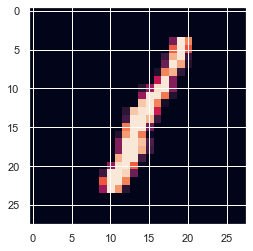

---인식된 숫자는? [1] 입니다


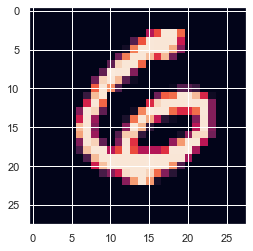

---인식된 숫자는? [6] 입니다


In [26]:
import random

for i in range(4):
    n = random.randrange(0, len(x_test))
    
    img = np.reshape(x_test.iloc[n].values, [28,28])
    plt.imshow(img)
    plt.show()

    result = forest.predict([x_test.iloc[n].values])
    print('---인식된 숫자는?', result, '입니다')